## Set configs

In [41]:
paralaf=dict()
paralaf['sin'] = (45, 0.005, 401, 1000)
paralaf['tru'] = (45, 0.005, 401, 1000)
paralaf['zoi'] = (45, 0.005, 401, 1000)
paralaf['mnist'] = (10, 0.2, 21, 1000)
paralaf['cifar10'] = (20, 0.2, 21, 3000)
paralaf['adult'] = (15, 0.2, 21, 3000)
paralaf['protein'] = (30, 0.2, 21, 3000)
paralaf['ct'] = (30, 0.2, 21, 3000)
paralaf['workloads'] = (30, 0.2, 21, 3000)
paralaf['msd'] = (10, 0.2, 21, 3000)

N_list=[9,17,33,65,129]
h_list=[0.5,0.25,0.125,0.0625,0.03125]

modelseed_list = [402025, 102025, 202025, 302025, 3070, 4080, 5090, 20250101, 72, 46852]
task_name_list = ['sin', 'tru', 'zoi', 'mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
modelname_list = ['LAF', 'relu', 'cos', 'tanh', 'sigmoid', 'PL', 'BS']

In [42]:
import numpy as np
def find_np(task_name, modelname, propty, epochs, M, h, N=17, L=-2, R=2, lambda1=1, lambda2=0.1, verbose=False):
    foldername={
            'test_loss': 'losses',
            'train_loss': 'losses',
            'test_acc': 'accuracies',
            'train_acc': 'accuracies',
            'test_time': 'times',
            'train_time': 'times',
            'coef': 'coef',
            'features': 'features',
        }
    
    tmparr = []
    if modelname in ['LAN', 'LANBS', 'LANPL', 'KAN', 'MLP']:
        seedlength = 3
    else:
        seedlength = 10
    for modelseed in modelseed_list[:seedlength]:
        if modelname=='LAF':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt"
        elif modelname=='BS':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt"
        elif modelname=='PL':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt"
        elif modelname in ['relu', 'cos', 'tanh', 'sigmoid']:
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_M={M}.txt"
        elif modelname=='LAN':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_h={h}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt"
        elif modelname=='LANBS':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt"
        elif modelname=='LANPL':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_N={N}_M={M}_lambda1={lambda1}_lambda2={lambda2}.txt"
        elif modelname=='KAN':
            filename = f"./{foldername[propty]}/{task_name}_{modelname}_{propty}_seed={modelseed}_epoch={epochs}_N={N}_L={L}_R={R}_M={M}.txt"
        elif modelname=='MLP':    
            filename = f"./{foldername[propty]}/{task_name}_Nrelu_{propty}_seed={modelseed}_epoch={epochs}_M={M}.txt"
        try:    
            tmparr.append(np.loadtxt(filename))
        except FileNotFoundError:
            print(f"Not found: {filename}")
            continue
    tmparr = np.array(tmparr)
    tmp = tmparr
    if not verbose:
        if propty[-4:]=='loss':
            tmp = tmparr.min(axis=1)
        elif propty[-3:]=='acc':
            tmp = tmparr.max(axis=1)
        if propty[-4:]=='time':
            tmp = tmparr.mean(axis=1)
    
    return tmp

## Load data

In [43]:
# 1 LAF PL BS with N

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

datadict = dict()

for modelname in ['LAF', 'PL', 'BS']:
    for i, task_name in enumerate(task_name_list):
        if task_name in ['sin', 'tru', 'zoi']:
            continue
        L,R,lambda1,lambda2=-2,2,1,0.1
        epochs,_,_,M=paralaf[task_name]
        
        for h, N in zip(h_list,N_list):      
            fullname = task_name+modelname+f'{N}'
            datadict[fullname] = dict()
            datadict[fullname]['train_loss'] = find_np(task_name, modelname, 'train_loss', epochs, M, h, N)
            datadict[fullname]['test_loss'] = find_np(task_name, modelname, 'test_loss', epochs, M, h, N)
            datadict[fullname]['train_time'] = find_np(task_name, modelname, 'train_time', epochs, M, h, N)
            datadict[fullname]['test_time'] = find_np(task_name, modelname, 'test_time', epochs, M, h, N)
            if task_name in ['mnist', 'cifar10', 'adult']:
                datadict[fullname]['train_acc'] = find_np(task_name, modelname, 'train_acc', epochs, M, h, N)
                datadict[fullname]['test_acc'] = find_np(task_name, modelname, 'test_acc', epochs, M, h, N)

In [44]:
# 2 all RF
for i, task_name in enumerate(task_name_list):
    L,R,lambda1,lambda2=-2,2,1,0.1
    epochs,h,N,M=paralaf[task_name]
    for modelname in modelname_list:
        fullname = task_name+modelname
        datadict[fullname] = dict()
        datadict[fullname]['train_loss'] = find_np(task_name, modelname, 'train_loss', epochs, M, h, N)
        datadict[fullname]['test_loss'] = find_np(task_name, modelname, 'test_loss', epochs, M, h, N)
        datadict[fullname]['train_time'] = find_np(task_name, modelname, 'train_time', epochs, M, h, N)
        datadict[fullname]['test_time'] = find_np(task_name, modelname, 'test_time', epochs, M, h, N)
        if task_name in ['mnist', 'cifar10', 'adult']:
            datadict[fullname]['train_acc'] = find_np(task_name, modelname, 'train_acc', epochs, M, h, N)
            datadict[fullname]['test_acc'] = find_np(task_name, modelname, 'test_acc', epochs, M, h, N)
            

In [45]:
# 3 PL with N

PL_N_list = [3, 5, 7, 9, 17, 33]

for modelname in ['PL']:
    for i, task_name in enumerate(task_name_list):
        if task_name in ['sin', 'tru', 'zoi']:
            continue
        L,R,lambda1,lambda2=-2,2,1,0.1
        epochs,_,_,M=paralaf[task_name]
        
        for h, N in zip([0, 0, 0, 0, 0, 0], PL_N_list):
            fullname = task_name+modelname+f'{N}'
            datadict[fullname] = dict()
            datadict[fullname]['train_loss'] = find_np(task_name, modelname, 'train_loss', epochs, M, h, N)
            datadict[fullname]['test_loss'] = find_np(task_name, modelname, 'test_loss', epochs, M, h, N)
            datadict[fullname]['train_time'] = find_np(task_name, modelname, 'train_time', epochs, M, h, N)
            datadict[fullname]['test_time'] = find_np(task_name, modelname, 'test_time', epochs, M, h, N)
            if task_name in ['mnist', 'cifar10', 'adult']:
                datadict[fullname]['train_acc'] = find_np(task_name, modelname, 'train_acc', epochs, M, h, N)
                datadict[fullname]['test_acc'] = find_np(task_name, modelname, 'test_acc', epochs, M, h, N)

In [46]:
# 4 all unfrozen

modelseed_listnow = modelseed_list[:3]

for modelname in ['LAN', 'KAN', 'MLP', 'LANBS', 'LANPL']:
    for i, task_name in enumerate(task_name_list):
        if task_name in ['sin', 'tru', 'zoi']:
            continue
        L,R,lambda1,lambda2=-2,2,1,0.1
        epochs,_,_,M=paralaf[task_name]
        
        if modelname[:3]=='LAN':
            h, N = 0.25, 17
        elif modelname=='KAN':
            h, N = None, 16
        else: 
            h, N = None, None
        fullname = task_name+modelname
        datadict[fullname] = dict()
        datadict[fullname]['train_loss'] = find_np(task_name, modelname, 'train_loss', epochs, M, h, N)
        datadict[fullname]['test_loss'] = find_np(task_name, modelname, 'test_loss', epochs, M, h, N)
        datadict[fullname]['train_time'] = find_np(task_name, modelname, 'train_time', epochs, M, h, N)
        datadict[fullname]['test_time'] = find_np(task_name, modelname, 'test_time', epochs, M, h, N)
        if task_name in ['mnist', 'cifar10', 'adult']:
            datadict[fullname]['train_acc'] = find_np(task_name, modelname, 'train_acc', epochs, M, h, N)
            datadict[fullname]['test_acc'] = find_np(task_name, modelname, 'test_acc', epochs, M, h, N)

## Tables in the Paper

In [47]:
import pandas as pd

In [48]:
pd.set_option('display.float_format', '{:.3f}'.format)
setN = 17
attrib = 'loss'
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']
tmp_model_name_list = ['LAF', 'BS', 'PL', 'relu', 'cos', 'tanh', 'sigmoid']

pd_columnname = [
    f'LAF{setN-1}_{attrib}',
    f'BS{setN-1}_{attrib}',
    f'PL{setN-1}_{attrib}',
    f'reLU_{attrib}',
    f'cos_{attrib}',    
    f'tanh_{attrib}',
    f'sigmoid_{attrib}',
]
curpdloss = pd.DataFrame(index=write_task_name_list, columns=pd_columnname)
stdarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
for i, task in enumerate(tmp_task_name_list):
    for j, model in enumerate(tmp_model_name_list):
        if model in ['LAF', 'BS', 'PL']:
            curmodelname = task+model+f'{setN}'
        else:
            curmodelname = task+model
        curpdloss.iloc[i,j] = datadict[curmodelname]['test_loss'].mean()
        stdarr[i,j] = datadict[curmodelname]['test_loss'].std()
        
print(f'N = {setN}')
print(f'{'':<14}  {'RBF':20}{'BS':20}{'PL':20}{'ReLU':20}{'Cos':20}{'Tanh':20}{'Sigmoid':20}')
for i, task in enumerate(tmp_task_name_list):
    
    writearr = curpdloss.iloc[i].to_numpy()
    writearr[2] = curpdloss.iloc[i,2] if curpdloss.iloc[i,2]<100 else np.inf
    
    agsort = np.argsort(writearr)[:2]
    
    writestr = f'{write_task_name_list[i]:<12}\t'
    for j, model in enumerate(tmp_model_name_list):
        if j==2 and i>=2:
            writestr += f'& - '
            continue
        if j not in agsort:
            writestr += f'& ${curpdloss.iloc[i,j]:.3f}_{{\\pm {stdarr[i,j]:.3f}}}$ '
        elif j == agsort[0]:
            writestr += f'& $\\bf{{{curpdloss.iloc[i,j]:.3f}_{{\\pm {stdarr[i,j]:.3f}}}}}$ '
        elif j == agsort[1]:
            writestr += f'& $\\it{{{curpdloss.iloc[i,j]:.3f}_{{\\pm {stdarr[i,j]:.3f}}}}}$ '
    print(writestr + '\\\\')
    if i==2:
        print('\\midrule')
curpdloss

N = 17
                RBF                 BS                  PL                  ReLU                Cos                 Tanh                Sigmoid             
MNIST       	& $\it{0.126_{\pm 0.011}}$ & $0.165_{\pm 0.021}$ & $\bf{0.124_{\pm 0.003}}$ & $0.159_{\pm 0.002}$ & $1.390_{\pm 0.055}$ & $0.277_{\pm 0.003}$ & $0.498_{\pm 0.017}$ \\
CIFAR-10    	& $\bf{1.450_{\pm 0.011}}$ & $1.609_{\pm 0.025}$ & $1.482_{\pm 0.016}$ & $\it{1.466_{\pm 0.004}}$ & $2.641_{\pm 0.125}$ & $1.769_{\pm 0.003}$ & $1.930_{\pm 0.028}$ \\
adult       	& $\bf{0.309_{\pm 0.002}}$ & $0.324_{\pm 0.005}$ & - & $\it{0.311_{\pm 0.002}}$ & $0.363_{\pm 0.020}$ & $0.324_{\pm 0.003}$ & $0.327_{\pm 0.004}$ \\
\midrule
protein     	& $\it{0.204_{\pm 0.003}}$ & $\bf{0.194_{\pm 0.002}}$ & - & $0.241_{\pm 0.001}$ & $0.371_{\pm 0.022}$ & $0.650_{\pm 0.009}$ & $0.280_{\pm 0.025}$ \\
ct          	& $\bf{0.212_{\pm 0.016}}$ & $\it{0.302_{\pm 0.038}}$ & - & $0.356_{\pm 0.096}$ & $0.589_{\pm 0.060}$ & $1.241_{\pm 0.133}$ & $0.6

,LAF16_loss,BS16_loss,PL16_loss,reLU_loss,cos_loss,tanh_loss,sigmoid_loss
MNIST,0.126,0.165,0.124,0.159,1.390,0.277,0.498
CIFAR-10,1.450,1.609,1.482,1.466,2.641,1.769,1.930
adult,0.309,0.324,inf,0.311,0.363,0.324,0.327
protein,0.204,0.194,inf,0.241,0.371,0.650,0.280
ct,0.212,0.302,inf,0.356,0.589,1.241,0.692
workloads,0.465,0.546,inf,2.771,2.634,24.997,1.707
millionsongs,0.102,0.120,inf,0.951,0.280,8.434,0.118


In [49]:
pd.set_option('display.float_format', '{:.3f}'.format)
setN = 17
pd_columnname = [
    f'LAF{setN-1}_train',
    f'BS{setN-1}_train',
    f'LAF{setN-1}_test',
    f'BS{setN-1}_test',
]
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']
tmp_model_name_list = ['LAF', 'BS']

curpdtime = pd.DataFrame(index=write_task_name_list, columns=pd_columnname)

for i, task in enumerate(tmp_task_name_list):
    for j, model in enumerate(tmp_model_name_list):
        curmodelname = task+model+f'{setN}'
        curpdtime.iloc[i,j] = datadict[curmodelname]['train_time'].mean()/datadict[task+'relu']['train_time'].mean()
        curpdtime.iloc[i,j+len(pd_columnname)//2] = datadict[curmodelname]['test_time'].mean()/datadict[task+'relu']['test_time'].mean()

# for times
for i, task in enumerate(tmp_task_name_list):
    print(f'{write_task_name_list[i]:<12}\t&{curpdtime.iloc[i,0]:.1f}\t\
&{curpdtime.iloc[i,1]:.1f}\t&{curpdtime.iloc[i,2]:.1f}\t\
&{curpdtime.iloc[i,3]:.1f}\t\\\\')

curpdtime

MNIST       	&1.1	&1.5	&1.1	&1.4	\\
CIFAR-10    	&1.1	&1.4	&1.0	&1.4	\\
adult       	&1.7	&4.2	&2.1	&6.2	\\
protein     	&1.8	&4.7	&2.0	&6.3	\\
ct          	&1.6	&3.9	&1.6	&4.4	\\
workloads   	&1.3	&3.4	&1.4	&4.4	\\
millionsongs	&2.0	&5.1	&2.4	&7.3	\\


,LAF16_train,BS16_train,LAF16_test,BS16_test
MNIST,1.099,1.452,1.060,1.438
CIFAR-10,1.063,1.367,1.042,1.360
adult,1.683,4.236,2.103,6.197
protein,1.756,4.732,1.971,6.292
ct,1.618,3.864,1.613,4.400
workloads,1.269,3.372,1.381,4.425
millionsongs,1.974,5.139,2.387,7.324


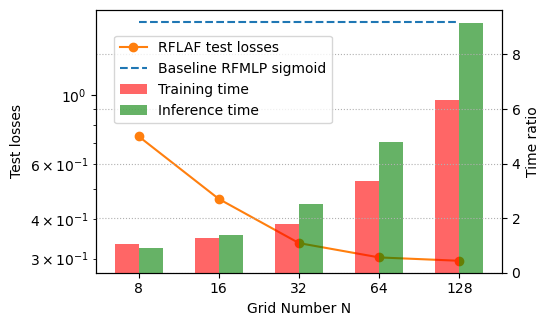

In [51]:
task = 'workloads'
model = 'LAF'
fullname = task + model
N_loss_list = np.array([datadict[fullname+f'{N}']['test_loss'].mean() for N in N_list])
N_train_list = np.array([datadict[fullname+f'{N}']['train_time'].mean()/datadict[task+'relu']['train_time'].mean() for N in N_list])
N_test_list = np.array([datadict[fullname+f'{N}']['test_time'].mean()/datadict[task+'relu']['test_time'].mean() for N in N_list])

fig, ax1 = plt.subplots(figsize=(5.6, 3.36))

colors = ['#ff7f0e','#1f77b4']
ax2 = ax1.twinx()

width = 0.3  
indices = np.arange(5)

ax2.bar(indices - width/2, N_train_list, width, color='r', alpha=0.6, label='Training time')
ax2.bar(indices + width/2, N_test_list, width, color='g', alpha=0.6, label='Inference time')

ax2.set_ylabel('Time ratio')
ax2.set_xticks(indices)
ax2.set_xticklabels(np.array(N_list)-1)

ax1.semilogy(N_loss_list, color=colors[0], marker='o', label='RFLAF test losses')
ax1.semilogy(np.ones(len(N_loss_list))*datadict[task+'sigmoid']['test_loss'].mean(), color=colors[1], linestyle='--', label='Baseline RFMLP sigmoid')
ax1.set_xlabel('Grid Number N')
ax1.set_ylabel('Test losses')

# fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.legend(loc='upper left', bbox_to_anchor=(0.2, 0.9))
ax2.grid(linestyle=':')

plt.tight_layout()
plt.savefig('Nfigure.pdf')
plt.show()


In [ ]:
# number of convergence epochs
tmp_task_name_list = ['mnist', 'cifar10', 'adult']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult']
modelname = 'LAF'

dataarr = np.zeros((len(tmp_task_name_list),len(N_list)))
for i, task_name in enumerate(tmp_task_name_list):
    epochs, _, _, M = paralaf[task_name]
    for j, N in enumerate(N_list):
        h = h_list[j]
        arr = find_np(task_name, modelname, 'test_loss', epochs, M, h, N, verbose = True)
        dataarr[i,j] = int(np.argmin(arr.mean(axis=0))+1)

for i in range(len(tmp_task_name_list)):
    writestr = f'{write_task_name_list[i]:<12}\t'
    for j in range(len(N_list)):
        writestr += f'& {int(dataarr[i,j])} \t'
    print(writestr + '\\\\')

MNIST       	& 10 	& 9 	& 4 	& 3 	& 3 	\\
CIFAR-10    	& 8 	& 3 	& 2 	& 2 	& 2 	\\
adult       	& 14 	& 4 	& 2 	& 1 	& 1 	\\


In [ ]:
# Loss comparison among regular networks
tmp_model_name_list = ['LAN', 'LANBS', 'LANPL', 'MLP', 'KAN']
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']

meanarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
stdarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
for i, task in enumerate(tmp_task_name_list):
    for j, model in enumerate(tmp_model_name_list):
        curmodelname = task+model
        meanarr[i,j] = datadict[curmodelname]['test_loss'].mean()
        stdarr[i,j] = datadict[curmodelname]['test_loss'].std()


print(f'{'':<14}', end='')
for model in tmp_model_name_list:
    print(model, end ='\t')
print()

for i, task in enumerate(tmp_task_name_list):
    
    writearr = meanarr[i]
    agsort = np.argsort(writearr)[:2]
    
    writestr = f'{write_task_name_list[i]:<12}\t'
    for j, model in enumerate(tmp_model_name_list):
        if model=='LANPL' and task in ['protein', 'ct', 'msd']:
            writestr += f'& - '
            continue
        if j not in agsort:
            writestr += f'& ${meanarr[i,j]:.3f}_{{\\pm {stdarr[i,j]:.3f}}}$ '
        elif j == agsort[0]:
            writestr += f'& $\\bf{{{meanarr[i,j]:.3f}_{{\\pm {stdarr[i,j]:.3f}}}}}$ '
        elif j == agsort[1]:
            writestr += f'& $\\it{{{meanarr[i,j]:.3f}_{{\\pm {stdarr[i,j]:.3f}}}}}$ '
    print(writestr + '\\\\')
    if i==2:
        print('\\midrule')

              LAN	LANBS	LANPL	MLP	KAN	
MNIST       	& $\it{0.124_{\pm 0.040}}$ & $\bf{0.105_{\pm 0.003}}$ & $0.181_{\pm 0.003}$ & $0.166_{\pm 0.003}$ & $0.161_{\pm 0.003}$ \\
CIFAR-10    	& $\bf{1.349_{\pm 0.010}}$ & $\it{1.375_{\pm 0.007}}$ & $1.484_{\pm 0.115}$ & $1.449_{\pm 0.005}$ & $1.475_{\pm 0.003}$ \\
adult       	& $\bf{0.302_{\pm 0.001}}$ & $0.308_{\pm 0.002}$ & $467.207_{\pm 597.765}$ & $\it{0.305_{\pm 0.000}}$ & $0.305_{\pm 0.000}$ \\
\midrule
protein     	& $\it{0.220_{\pm 0.002}}$ & $\bf{0.195_{\pm 0.002}}$ & - & $0.234_{\pm 0.001}$ & $0.372_{\pm 0.000}$ \\
ct          	& $\it{0.026_{\pm 0.000}}$ & $\bf{0.023_{\pm 0.002}}$ & - & $0.031_{\pm 0.001}$ & $4.938_{\pm 0.000}$ \\
workloads   	& $\it{0.285_{\pm 0.012}}$ & $\bf{0.266_{\pm 0.021}}$ & $0.956_{\pm 0.276}$ & $2.090_{\pm 0.025}$ & $7.207_{\pm 0.000}$ \\
millionsongs	& $\bf{0.077_{\pm 0.002}}$ & $\it{0.082_{\pm 0.001}}$ & - & $0.550_{\pm 0.007}$ & $0.367_{\pm 0.000}$ \\


In [ ]:
# Time comparison among regular networks
tmp_model_name_list = ['LAN', 'LANBS', 'MLP', 'KAN']
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']

meanarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
stdarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
for i, task in enumerate(tmp_task_name_list):
    for j, model in enumerate(tmp_model_name_list):
        curmodelname = task+model
        meanarr[i,j] = datadict[curmodelname]['test_time'].mean()/datadict[task+'MLP']['test_time'].mean()

print(f'{'':<14}', end='')
for model in tmp_model_name_list:
    print(model, end ='\t')
print()

for i, task in enumerate(tmp_task_name_list):
    
    writearr = meanarr[i]
    agsort = np.argsort(writearr)[:2]
    
    writestr = f'{write_task_name_list[i]:<12}\t'
    for j, model in enumerate(tmp_model_name_list):
        writestr += f'& ${meanarr[i,j]:.1f}$ '
    print(writestr + '\\\\')
    if i==2:
        print('\\hline')

              LAN	LANBS	MLP	KAN	
MNIST       	& $1.1$ & $1.4$ & $1.0$ & $1.1$ \\
CIFAR-10    	& $1.1$ & $1.3$ & $1.0$ & $1.1$ \\
adult       	& $2.2$ & $6.0$ & $1.0$ & $1.9$ \\
\hline
protein     	& $1.7$ & $5.1$ & $1.0$ & $1.8$ \\
ct          	& $1.8$ & $4.6$ & $1.0$ & $1.7$ \\
workloads   	& $2.0$ & $5.5$ & $1.0$ & $1.7$ \\
millionsongs	& $1.9$ & $5.2$ & $1.0$ & $1.7$ \\


In [95]:
# For frozen two-layer networks
tmp_task_name_list = ['mnist', 'cifar10', 'adult', 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult', 'protein', 'ct', 'workloads', 'millionsongs']
tmp_model_name_list = ['LAF', 'BS', 'PL']
write_model_name_list = ['RBF', 'BS', 'PL']
attrib = 'loss'

N = 16

print(f'{'Model-N':<8}', end='')
for i, task_name in enumerate(write_task_name_list):
    print(f'& {task_name}', end='\t')
print()

rows, cols = 4+3*5+3, 7

meanarr = np.zeros((rows, cols))

for k, model in enumerate(['relu', 'cos', 'tanh', 'sigmoid']):
    for i, task in enumerate(tmp_task_name_list):
        meanarr[k,i] = datadict[task+model]['test_loss'].mean()

for j, N in enumerate(np.array([8, 16, 32, 64, 128])+1):
    for k, model in enumerate(tmp_model_name_list):
        for i, task in enumerate(tmp_task_name_list):
            value = datadict[task+model+f'{N}']['test_loss'].mean()
            meanarr[4+j*3+k,i]= value if value < 100 else np.inf
            
for j, N in enumerate(np.array([2,4,6])+1):
    for i, task in enumerate(tmp_task_name_list):
        value = datadict[task+'PL'+f'{N}']['test_loss'].mean()
        meanarr[4+5*3+j,i]= value if value < 100 else np.inf
     
idx_list = np.argmin(meanarr, axis = 0)   

writestr = ''
for k, model in enumerate(['relu', 'cos', 'tanh', 'sigmoid']):
    writestr += f'{model}\t'
    for i, task in enumerate(tmp_task_name_list):
        line = k
        if line == idx_list[i]:
            writestr += f'& $\\bf{{{meanarr[k,i]:.3f}}}$\t'
        else:
            writestr += f'& ${meanarr[k,i]:.3f}$\t'
    writestr += '\\\\\n'
writestr += '\\hline\n'

for j, N in enumerate(np.array([8, 16, 32, 64, 128])+1):
    for k, model in enumerate(write_model_name_list):
        writestr += f'{model}-{N-1}\t'
        for i, task in enumerate(tmp_task_name_list):
            line = 4+j*3+k
            if line == idx_list[i]:
                writestr += f'& $\\bf{{{meanarr[4+j*3+k,i]:.3f}}}$\t'
            else:
                writestr += f'& ${meanarr[4+j*3+k,i]:.3f}$\t'
        writestr += '\\\\\n'
    writestr += '\\hline\n'

for j, N in enumerate(np.array([2,4,6])+1):
    writestr += f'PL-{N-1}\t'
    for i, task in enumerate(tmp_task_name_list):
        line = 4+5*3+j
        if line == idx_list[i]:
            writestr += f'& $\\bf{{{meanarr[4+5*3+j,i]:.3f}}}$\t'
        else:
            writestr += f'& ${meanarr[4+5*3+j,i]:.3f}$\t'
    writestr += '\\\\\n'
print(writestr.replace('$inf$', '\\sc{inf}'))

Model-N & MNIST	& CIFAR-10	& adult	& protein	& ct	& workloads	& millionsongs	
relu	& $0.159$	& $1.466$	& $0.311$	& $0.241$	& $0.356$	& $2.771$	& $0.951$	\\
cos	& $1.390$	& $2.641$	& $0.363$	& $0.371$	& $0.589$	& $2.634$	& $0.280$	\\
tanh	& $0.277$	& $1.769$	& $0.324$	& $0.650$	& $1.241$	& $24.997$	& $8.434$	\\
sigmoid	& $0.498$	& $1.930$	& $0.327$	& $0.280$	& $0.692$	& $1.707$	& $0.118$	\\
\hline
RBF-8	& $0.204$	& $\bf{1.440}$	& $\bf{0.307}$	& $0.230$	& $0.202$	& $0.736$	& $0.103$	\\
BS-8	& $0.146$	& $1.490$	& $0.312$	& $0.198$	& $0.259$	& $0.476$	& $0.129$	\\
PL-8	& $0.129$	& $1.470$	& $0.322$	& \sc{inf}	& \sc{inf}	& $0.827$	& \sc{inf}	\\
\hline
RBF-16	& $0.126$	& $1.450$	& $0.309$	& $0.204$	& $0.212$	& $0.465$	& $0.102$	\\
BS-16	& $0.165$	& $1.609$	& $0.324$	& $0.194$	& $0.302$	& $0.546$	& $0.120$	\\
PL-16	& $\bf{0.124}$	& $1.482$	& \sc{inf}	& \sc{inf}	& \sc{inf}	& \sc{inf}	& \sc{inf}	\\
\hline
RBF-32	& $0.137$	& $1.462$	& $0.314$	& $0.184$	& $0.201$	& $0.336$	& $0.103$	\\
BS-32	& $0

In [ ]:
print(f'{'Model-N':<8}', end='')
for i, task_name in enumerate(write_task_name_list):
    print(f'& {task_name}', end='\t')
print()

rows, cols = 4+3*5+3, 7

meanarr = np.zeros((rows, cols))

# propty = 'train_time'
propty = 'test_time'

for k, model in enumerate(['relu', 'cos', 'tanh', 'sigmoid']):
    for i, task in enumerate(tmp_task_name_list):
        meanarr[k,i] = datadict[task+model][propty].mean()/datadict[task+'relu'][propty].mean()

for j, N in enumerate(np.array([8, 16, 32, 64, 128])+1):
    for k, model in enumerate(tmp_model_name_list):
        for i, task in enumerate(tmp_task_name_list):
            value = datadict[task+model+f'{N}'][propty].mean()/datadict[task+'relu'][propty].mean()
            meanarr[4+j*3+k,i]= value
            
for j, N in enumerate(np.array([2,4,6])+1):
    for i, task in enumerate(tmp_task_name_list):
        value = datadict[task+'PL'+f'{N}'][propty].mean()/datadict[task+'relu'][propty].mean()
        meanarr[4+5*3+j,i]= value

writestr = ''
for k, model in enumerate(['relu', 'cos', 'tanh', 'sigmoid']):
    writestr += f'{model}\t'
    for i, task in enumerate(tmp_task_name_list):
        line = k
        writestr += f'& ${meanarr[k,i]:.3f}$\t'
    writestr += '\\\\\n'
writestr += '\\hline\n'

for j, N in enumerate(np.array([8, 16, 32, 64, 128])+1):
    for k, model in enumerate(write_model_name_list):
        writestr += f'{model}-{N-1}\t'
        for i, task in enumerate(tmp_task_name_list):
            line = 4+j*3+k
            writestr += f'& ${meanarr[4+j*3+k,i]:.3f}$\t'
        writestr += '\\\\\n'
    writestr += '\\hline\n'

for j, N in enumerate(np.array([2,4,6])+1):
    writestr += f'PL-{N-1}\t'
    for i, task in enumerate(tmp_task_name_list):
        line = 4+5*3+j
        writestr += f'& ${meanarr[4+5*3+j,i]:.3f}$\t'
    writestr += '\\\\\n'
print(writestr.replace('$inf$', '\\sc{inf}'))

Model-N & MNIST	& CIFAR-10	& adult	& protein	& ct	& workloads	& millionsongs	
relu	& $1.000$	& $1.000$	& $1.000$	& $1.000$	& $1.000$	& $1.000$	& $1.000$	\\
cos	& $1.002$	& $1.000$	& $1.029$	& $1.022$	& $1.053$	& $0.996$	& $1.179$	\\
tanh	& $0.998$	& $1.001$	& $0.996$	& $1.028$	& $1.006$	& $1.026$	& $1.218$	\\
sigmoid	& $0.992$	& $0.997$	& $0.931$	& $0.903$	& $0.965$	& $0.988$	& $1.241$	\\
\hline
RBF-8	& $1.022$	& $0.997$	& $1.474$	& $1.337$	& $1.214$	& $0.924$	& $1.630$	\\
BS-8	& $1.242$	& $1.193$	& $3.730$	& $3.707$	& $2.730$	& $2.683$	& $4.330$	\\
PL-8	& $1.018$	& $1.010$	& $1.312$	& $1.191$	& $1.020$	& $0.814$	& $1.396$	\\
\hline
RBF-16	& $1.060$	& $1.042$	& $2.103$	& $1.971$	& $1.613$	& $1.381$	& $2.387$	\\
BS-16	& $1.438$	& $1.360$	& $6.197$	& $6.292$	& $4.400$	& $4.425$	& $7.324$	\\
PL-16	& $1.043$	& $1.037$	& $1.677$	& $1.486$	& $1.277$	& $1.041$	& $1.874$	\\
\hline
RBF-32	& $1.137$	& $1.154$	& $3.664$	& $3.523$	& $2.683$	& $2.503$	& $4.182$	\\
BS-32	& $1.843$	& $1.750$	& $11.61

In [105]:
pd.set_option('display.float_format', '{:.2f}'.format)
setN = 17
attrib = 'acc'
tmp_task_name_list = ['mnist', 'cifar10', 'adult']#, 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult']#, 'protein', 'ct', 'workloads', 'millionsongs']
tmp_model_name_list = ['LAF', 'BS', 'PL', 'relu', 'cos', 'tanh', 'sigmoid']

pd_columnname = [
    f'LAF{setN-1}_{attrib}',
    f'BS{setN-1}_{attrib}',
    f'PL{setN-1}_{attrib}',
    f'reLU_{attrib}',
    f'cos_{attrib}',    
    f'tanh_{attrib}',
    f'sigmoid_{attrib}',
]
curpdloss = pd.DataFrame(index=write_task_name_list, columns=pd_columnname)
stdarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
for i, task in enumerate(tmp_task_name_list):
    for j, model in enumerate(tmp_model_name_list):
        if model in ['LAF', 'BS', 'PL']:
            curmodelname = task+model+f'{setN}'
        else:
            curmodelname = task+model
        curpdloss.iloc[i,j] = datadict[curmodelname]['test_acc'].mean()*100
        stdarr[i,j] = datadict[curmodelname]['test_acc'].std()*100
        
print(f'N = {setN}')
print(f'{'':<14}  {'RBF':20}{'BS':20}{'PL':20}{'ReLU':20}{'Cos':20}{'Tanh':20}{'Sigmoid':20}')
for i, task in enumerate(tmp_task_name_list):
    
    writearr = curpdloss.iloc[i].to_numpy()
    writearr[2] = curpdloss.iloc[i,2] if curpdloss.iloc[i,2]<100 else np.inf
    
    agsort = np.argsort(-writearr)[:2]
    
    writestr = f'{write_task_name_list[i]:<12}\t'
    for j, model in enumerate(tmp_model_name_list):
        if j==2 and i>=2:
            writestr += f'& - '
            continue
        if j not in agsort:
            writestr += f'& ${curpdloss.iloc[i,j]:.2f}_{{\\pm {stdarr[i,j]:.2f}}}$ '
        elif j == agsort[0]:
            writestr += f'& $\\bf{{{curpdloss.iloc[i,j]:.2f}_{{\\pm {stdarr[i,j]:.2f}}}}}$ '
        elif j == agsort[1]:
            writestr += f'& $\\it{{{curpdloss.iloc[i,j]:.2f}_{{\\pm {stdarr[i,j]:.2f}}}}}$ '
    print(writestr + '\\\\')
    if i==2:
        print('\\midrule')
curpdloss

N = 17
                RBF                 BS                  PL                  ReLU                Cos                 Tanh                Sigmoid             
MNIST       	& $\it{96.10_{\pm 0.30}}$ & $94.95_{\pm 0.63}$ & $\bf{96.26_{\pm 0.13}}$ & $95.40_{\pm 0.09}$ & $65.98_{\pm 4.43}$ & $92.30_{\pm 0.06}$ & $86.86_{\pm 0.56}$ \\
CIFAR-10    	& $48.95_{\pm 0.36}$ & $44.29_{\pm 0.58}$ & $\bf{49.20_{\pm 0.42}}$ & $\it{48.99_{\pm 0.23}}$ & $18.44_{\pm 1.52}$ & $39.62_{\pm 0.23}$ & $34.12_{\pm 1.60}$ \\
adult       	& $\bf{85.66_{\pm 0.15}}$ & $85.05_{\pm 0.18}$ & - & $\it{85.63_{\pm 0.11}}$ & $83.85_{\pm 0.74}$ & $85.05_{\pm 0.15}$ & $84.90_{\pm 0.31}$ \\
\midrule


,LAF16_acc,BS16_acc,PL16_acc,reLU_acc,cos_acc,tanh_acc,sigmoid_acc
MNIST,96.10,94.95,96.26,95.40,65.98,92.30,86.86
CIFAR-10,48.95,44.29,49.20,48.99,18.44,39.62,34.12
adult,85.66,85.05,82.59,85.63,83.85,85.05,84.90


In [108]:
# Acc comparison among regular networks
tmp_model_name_list = ['LAN', 'LANBS', 'LANPL', 'MLP', 'KAN']
tmp_task_name_list = ['mnist', 'cifar10', 'adult']#, 'protein', 'ct', 'workloads', 'msd']
write_task_name_list = ['MNIST', 'CIFAR-10', 'adult']#, 'protein', 'ct', 'workloads', 'millionsongs']

meanarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
stdarr = np.zeros((len(tmp_task_name_list), len(tmp_model_name_list)))
for i, task in enumerate(tmp_task_name_list):
    for j, model in enumerate(tmp_model_name_list):
        curmodelname = task+model
        meanarr[i,j] = datadict[curmodelname]['test_acc'].mean()*100
        stdarr[i,j] = datadict[curmodelname]['test_acc'].std()*100


print(f'{'':<14}', end='')
for model in tmp_model_name_list:
    print(model, end ='\t')
print()

for i, task in enumerate(tmp_task_name_list):
    
    writearr = meanarr[i]
    agsort = np.argsort(-writearr)[:2]
    
    writestr = f'{write_task_name_list[i]:<12}\t'
    for j, model in enumerate(tmp_model_name_list):
        if model=='LANPL' and task in ['protein', 'ct', 'msd']:
            writestr += f'& - '
            continue
        if j not in agsort:
            writestr += f'& ${meanarr[i,j]:.2f}_{{\\pm {stdarr[i,j]:.2f}}}$ '
        elif j == agsort[0]:
            writestr += f'& $\\bf{{{meanarr[i,j]:.2f}_{{\\pm {stdarr[i,j]:.2f}}}}}$ '
        elif j == agsort[1]:
            writestr += f'& $\\it{{{meanarr[i,j]:.2f}_{{\\pm {stdarr[i,j]:.2f}}}}}$ '
    print(writestr + '\\\\')

              LAN	LANBS	LANPL	MLP	KAN	
MNIST       	& $\it{96.40_{\pm 1.15}}$ & $\bf{96.85_{\pm 0.15}}$ & $95.10_{\pm 0.16}$ & $95.99_{\pm 0.07}$ & $95.19_{\pm 0.14}$ \\
CIFAR-10    	& $\it{52.74_{\pm 0.36}}$ & $\bf{53.18_{\pm 0.61}}$ & $48.13_{\pm 3.91}$ & $49.61_{\pm 0.17}$ & $47.90_{\pm 0.18}$ \\
adult       	& $85.77_{\pm 0.08}$ & $85.76_{\pm 0.30}$ & $83.15_{\pm 0.50}$ & $\bf{85.85_{\pm 0.08}}$ & $\it{85.80_{\pm 0.07}}$ \\
